In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,Normalizer
from sklearn.decomposition import PCA
import time


In [79]:
df = pd.read_csv('train.csv')
df.head(4)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [81]:
(df.isna().sum() > 0).value_counts()

False    202
Name: count, dtype: int64

In [82]:
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [83]:
df_max = df.iloc[::,2:].max().sort_values(ascending=False)
df_min = df.iloc[::,2:].min().sort_values()

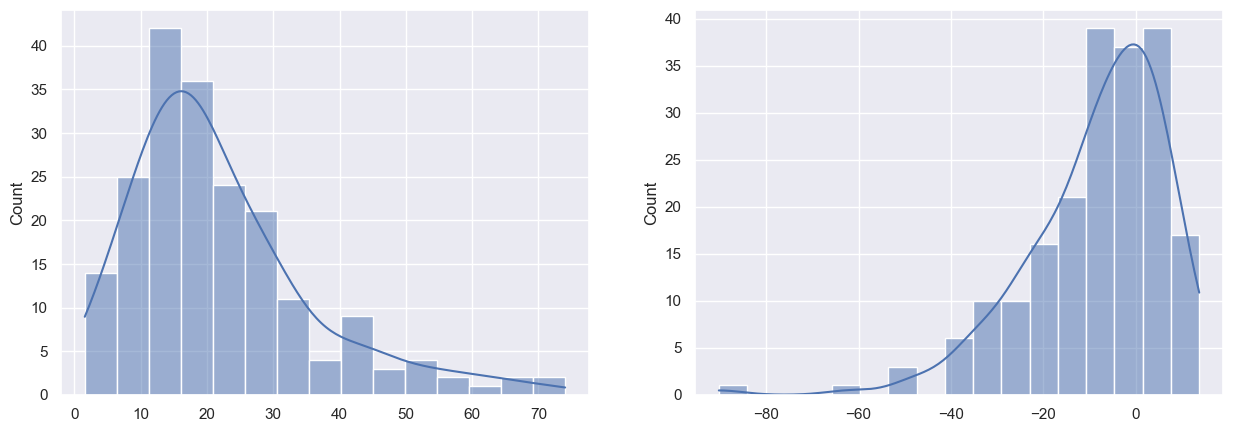

In [84]:
fig,axs = plt.subplots(1, 2,figsize = (15,5))
sns.set_theme(style="darkgrid")
sns.histplot(df_max, kde=True,ax=axs[0]);
sns.histplot(df_min, kde=True,ax=axs[1]);

In [85]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(x=df_max,name='Maximum'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df_min,name='Minimum'),
    row=1, col=2
)


fig.update_layout(title_text="Minimum And Maximum Variables Chart")
fig.show()

# Training Without Preprocessing

In [86]:
y = df['target']
x = df.iloc[::,2:]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .8,stratify=y)

# Perceptron

In [87]:
ppn = Perceptron(random_state=2)
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

In [88]:
lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [89]:
dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

In [90]:
result = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
result = pd.DataFrame(result, index=['Perceptron','Logistic Regression','Decision Tree'])
result

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,2.772516,0.90155,0.902619,0.516970,0.310697,0.388129
Logistic Regression,30.671190,0.91290,0.914356,0.672237,0.260199,0.375179
Decision Tree,465.482656,0.83600,1.000000,0.198050,0.207214,0.202529


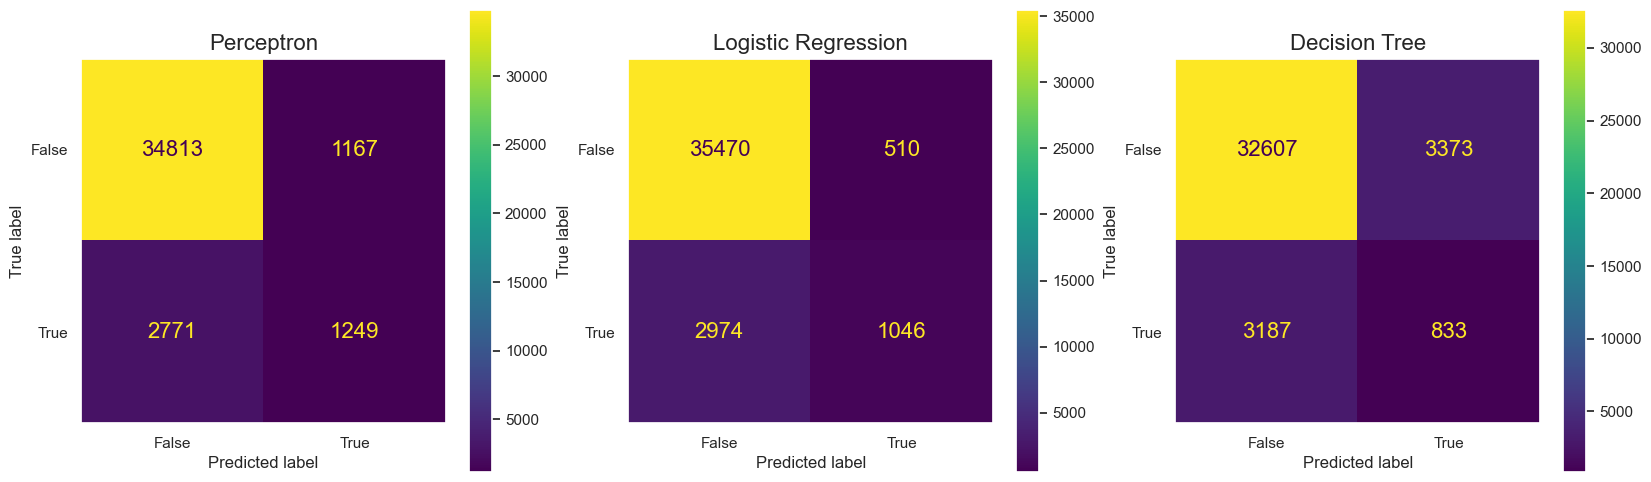

In [91]:
ppn_matrix = confusion_matrix(y_test, ppn_pred) 
ppn_display = ConfusionMatrixDisplay(confusion_matrix = ppn_matrix, display_labels = [False, True]) 

lr_matrix = confusion_matrix(y_test, lr_pred) 
lr_display = ConfusionMatrixDisplay(confusion_matrix = lr_matrix, display_labels = [False, True]) 

dt_matrix = confusion_matrix(y_test, dt_pred) 
dt_display = ConfusionMatrixDisplay(confusion_matrix = dt_matrix, display_labels = [False, True])

title_size = 16
plt.rcParams.update({'font.size':16})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))
ax1.set_title('Perceptron',size=title_size)
ax1.grid(False)
ppn_display.plot(ax=ax1)

ax2.set_title('Logistic Regression',size=title_size)
ax2.grid(False)
lr_display.plot(ax=ax2)

ax3.set_title('Decision Tree',size=title_size)
ax3.grid(False)
dt_display.plot(ax=ax3)

plt.show()


#  PreProcessing

# Min Max Scaler

In [92]:
scaler = MinMaxScaler()
scaler.fit(x)
x_minmax = scaler.transform(x)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, train_size= .8,stratify=y)
ppn = Perceptron(random_state=2)
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

min_max_scaler = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
min_max_scaler = pd.DataFrame(min_max_scaler, index=['Perceptron','Logistic Regression','Decision Tree'])
min_max_scaler

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,0.770000,0.86235,0.865231,0.378714,0.577114,0.457323
Logistic Regression,2.044988,0.91150,0.915119,0.651324,0.256965,0.368534
Decision Tree,538.928006,0.83660,1.000000,0.200333,0.209204,0.204673


# Normalizer

In [94]:
norm = Normalizer()
norm.fit(x)
x_norm = norm.transform(x)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, train_size= .8,stratify=y)
ppn = Perceptron(random_state=2)
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

normalize = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
normalize = pd.DataFrame(normalize, index=['Perceptron','Logistic Regression','Decision Tree'])
normalize

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,0.889000,0.904900,0.905069,0.835404,0.066915,0.123906
Logistic Regression,4.238988,0.908675,0.909619,0.717160,0.150746,0.249126
Decision Tree,579.792010,0.834950,1.000000,0.203355,0.220149,0.211419


# RobustScaler

In [96]:
robust_scaler = RobustScaler()
robust_scaler.fit(x)
x_robust = robust_scaler.transform(x)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x_robust, y, train_size= .8,stratify=y)
ppn = Perceptron(random_state=2)
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

robust_scaler_pd = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
robust_scaler_pd = pd.DataFrame(robust_scaler_pd, index=['Perceptron','Logistic Regression','Decision Tree'])
robust_scaler_pd

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,1.345001,0.872775,0.873162,0.353522,0.320896,0.336419
Logistic Regression,0.507999,0.913725,0.914631,0.687048,0.259950,0.377188
Decision Tree,547.584999,0.838925,1.000000,0.204872,0.209204,0.207015


# StandardScaler

In [98]:
std_scaler = StandardScaler()
std_scaler.fit(x)
x_std_scaler = std_scaler.transform(x)


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_std_scaler, y, train_size= .8,stratify=y)
ppn = Perceptron(random_state=2)
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

std_scaler_pd = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
std_scaler_pd = pd.DataFrame(std_scaler_pd, index=['Perceptron','Logistic Regression','Decision Tree'])
std_scaler_pd

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,1.224000,0.876250,0.875269,0.363876,0.309204,0.334320
Logistic Regression,0.518987,0.915350,0.914238,0.694240,0.281841,0.400920
Decision Tree,526.141009,0.836825,1.000000,0.205405,0.217413,0.211239


# PCA

In [100]:
principal=PCA(n_components=100)
principal.fit(x_std_scaler)
pca_std = principal.transform(x_std_scaler)

principal.fit(x_norm)
pca_norm = principal.transform(x_norm)

principal.fit(x_robust)
pca_robust = principal.transform(x_robust)

principal.fit(x_minmax)
pca_minmax = principal.transform(x_minmax)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(pca_std, y, train_size= .8,stratify=y)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

print('PCA + Standard Scaler')
print('Model Fit Time: '  + str(lr_time))
print('Test Score: ' + str(lr.score(x_test,y_test)))
print('Train Score: ' + str(lr.score(x_train,y_train)))
print('Precision Score: ' + str(precision_score(y_test,lr_pred)))
print('Recall Score: ' + str(recall_score(y_test,lr_pred)))
print('F1 Score: '  + str(f1_score(y_test,lr_pred)))


PCA + Standard Scaler
Model Fit Time: 0.27599358558654785
Test Score: 0.9136
Train Score: 0.914425
Precision Score: 0.6782553729456384
Recall Score: 0.26691542288557213
F1 Score: 0.38307747233131023


In [106]:
x_train, x_test, y_train, y_test = train_test_split(pca_robust, y, train_size= .8,stratify=y)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

print('PCA + Robust Scaler')
print('Model Fit Time: '  + str(lr_time))
print('Test Score: ' + str(lr.score(x_test,y_test)))
print('Train Score: ' + str(lr.score(x_train,y_train)))
print('Precision Score: ' + str(precision_score(y_test,lr_pred)))
print('Recall Score: ' + str(recall_score(y_test,lr_pred)))
print('F1 Score: '  + str(f1_score(y_test,lr_pred)))

PCA + Robust Scaler
Model Fit Time: 0.3139991760253906
Test Score: 0.913525
Train Score: 0.91305625
Precision Score: 0.6888888888888889
Recall Score: 0.2544776119402985
F1 Score: 0.37166212534059945


In [105]:
x_train, x_test, y_train, y_test = train_test_split(pca_norm, y, train_size= .8,stratify=y)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

print('PCA + Normalize')
print('Model Fit Time: '  + str(lr_time))
print('Test Score: ' + str(lr.score(x_test,y_test)))
print('Train Score: ' + str(lr.score(x_train,y_train)))
print('Precision Score: ' + str(precision_score(y_test,lr_pred)))
print('Recall Score: ' + str(recall_score(y_test,lr_pred)))
print('F1 Score: '  + str(f1_score(y_test,lr_pred)))

PCA + Normalize
Model Fit Time: 1.1310083866119385
Test Score: 0.902525
Train Score: 0.902825
Precision Score: 0.6604774535809018
Recall Score: 0.06194029850746269
F1 Score: 0.11325904025471913


In [104]:
x_train, x_test, y_train, y_test = train_test_split(pca_minmax, y, train_size= .8,stratify=y)

lr = LogisticRegression(random_state=2,max_iter=500)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

print('PCA + Min Max Scaler')
print('Model Fit Time: '  + str(lr_time))
print('Test Score: ' + str(lr.score(x_test,y_test)))
print('Train Score: ' + str(lr.score(x_train,y_train)))
print('Precision Score: ' + str(precision_score(y_test,lr_pred)))
print('Recall Score: ' + str(recall_score(y_test,lr_pred)))
print('F1 Score: '  + str(f1_score(y_test,lr_pred)))

PCA + Min Max Scaler
Model Fit Time: 0.42699217796325684
Test Score: 0.910075
Train Score: 0.91000625
Precision Score: 0.6746490503715937
Recall Score: 0.20323383084577115
F1 Score: 0.3123685719747658


In [107]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x_std_scaler, y, train_size= .8,stratify=y)

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.916

In [108]:
sv_pred = sv.predict(x_test)

In [109]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     35980
           1       0.76      0.24      0.37      4020

    accuracy                           0.92     40000
   macro avg       0.84      0.62      0.66     40000
weighted avg       0.90      0.92      0.90     40000



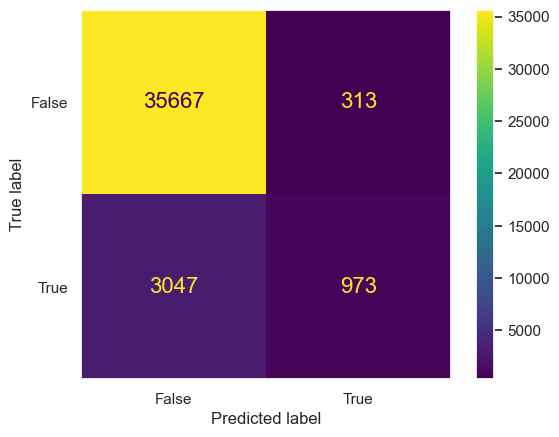

In [112]:
sv_matrix = confusion_matrix(y_test, sv_pred) 
sv_display = ConfusionMatrixDisplay(confusion_matrix = sv_matrix, display_labels = [False, True]) 

sv_display.plot()
plt.grid(False);